## Summary note of the phonon olympics entry for RbBr

- **Author**: Ryota MASUKI (The Univ. of Tokyo)
- **Date**: April. 27, 2022.
- **Codes**: VASP 6.2.0 + ALAMODE 1.3.0 (some new features of dev branch are also tested)

### VASP
- **Compilers**: Intel Compiler version 15.0.4 + Intel MKL  
- **Compile flags**: -O2
- **MPI library**: Intel MPI 5.1.3.210
- **Computer Resource**: Intel Xeon E5-2698v3, 2.3GHz, 16core x 2 / node

### ALAMODE


- **Compilers**: Intel Compiler version 18.0.2 + Intel MKL  
- **Compile flags**: -O2 -xHOST
- **MPI library**: Intel MPI 2018.2.199
- **Computer Resource**: Xeon Gold 6142, 2.60GHz, 16core x 2 / node

In [1]:
import pandas as pd
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.electronic_structure.plotter import BSPlotter



In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib as mpl

params = {'backend': 'ps',
          'text.latex.preamble': ['\\usepackage{gensymb}','\\usepackage{bm}','\\usepackage{braket}', '\\usepackage{amsmath}'],
          'axes.labelsize': 15, # fontsize for x and y labels (was 10)
          'axes.titlesize': 15,
          'font.size': 12, # was 10
          'legend.fontsize': 12, # was 10
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family': 'serif'
}

mpl.rcParams.update(params)

/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [3]:
c_light = 299792458.0
THz_to_kayser= 1.0e10 / (2.0 * np.pi * c_light);

THz_to_kayser

5.3088374588761456

## 1. Structure - summary

The calculations were performed using `VASP` code with the following input parameters:
```
SYSTEM = RbBr_primitive
EDIFF = 1.0e-8
PREC = A

ENCUT= 600
ADDGRID = .TRUE.
LREAL=.FALSE.
ISMEAR = 0
SIGMA = 0.05

NPAR = 16
NCORE = 1

LWAVE = .FALSE.
LCHARG = .FALSE.

ISIF = 3
NSW = 100
IBRION = 2

GGA = PE
```

As shown in the tables and figures below, the lattice constant obtained from the variable-cell relaxation (`ISIF=3`) appears to reach convergence at 6x6x6 k points and `ENCUT=600`. So, I have chosen

- **a = 7.0221 Angstrom**


In [4]:
# load data of lattice constant calculation
kpoints_results = np.loadtxt('../1_primitive_relax/analysis/kpoints_latconst/kpoints_result.txt')
cutoff_results = np.loadtxt("../1_primitive_relax/analysis/cutoff_latconst/cutoff_result.txt")


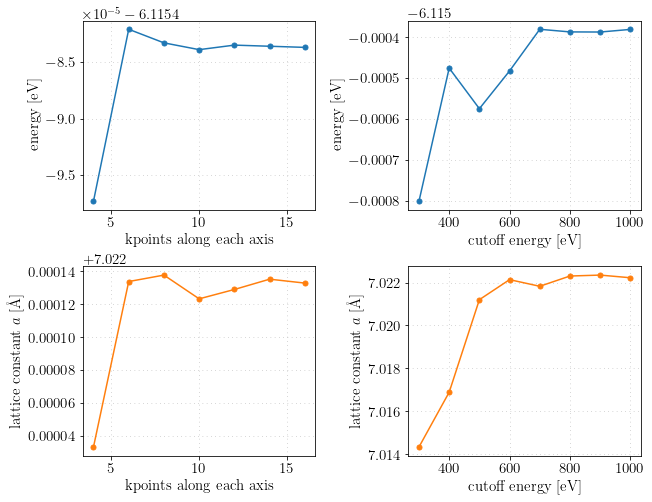

In [5]:
# plot results of convergence check
fig = plt.figure(figsize=(10, 8))

gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=0.4, hspace=0.3)

#####################################################################
ax = plt.subplot(gs[0])
# kpoints vs energy
ax.plot(kpoints_results[:,0], kpoints_results[:,4], linestyle='-', marker="o", ms = 5.0, lw=1.5, 
        color='#1f77b4',
        label = r'')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_ylabel(r'energy [eV]')
ax.set_xlabel(r"kpoints along each axis")

#####################################################################
ax = plt.subplot(gs[1])

# cutoff vs energy
ax.plot(cutoff_results[:,0], cutoff_results[:,4], linestyle='-', marker="o", ms = 5.0, lw=1.5, 
        color='#1f77b4',
        label = r'')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_ylabel(r'energy [eV]')
ax.set_xlabel(r"cutoff energy [eV]")

#####################################################################
ax = plt.subplot(gs[2])

# kpoints vs lattice constant
ax.plot(kpoints_results[:,0], kpoints_results[:,5], linestyle='-', marker="o", ms = 5.0, lw=1.5, 
        color='#ff7f0e',
        label = r'')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_ylabel(r'lattice constant $a$ [\AA]')
ax.set_xlabel(r"kpoints along each axis")

#####################################################################
ax = plt.subplot(gs[3])

# kpoints, energy
ax.plot(cutoff_results[:,0], cutoff_results[:,5], linestyle='-', marker="o", ms = 5.0, lw=1.5, 
        color='#ff7f0e',
        label = r'')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_ylabel(r'lattice constant $a$ [\AA]')
ax.set_xlabel(r"cutoff energy [eV]")

fig.savefig("1_lattice_constant_check.pdf")

The detailed information on each calculation is summarized in the tables below.

In [6]:
df_kpoints = pd.DataFrame(kpoints_results, columns = ["k points along each axis", "ionic steps", "num of cores", "elapsed time [s]", "total energy [eV]", "lattice constant [Ang]" ])
df_kpoints["cutoff [eV]"] = 600.0
df_kpoints = df_kpoints[["cutoff [eV]", "k points along each axis", "ionic steps", "num of cores", "elapsed time [s]", "total energy [eV]", "lattice constant [Ang]" ]]
df_kpoints

df_kpoints["computational time [cores*hours]"] = df_kpoints["num of cores"]*df_kpoints["elapsed time [s]"]/3600.0
df_kpoints = df_kpoints.reindex(["cutoff [eV]", "k points along each axis", "ionic steps", "num of cores", "elapsed time [s]","computational time [cores*hours]", "total energy [eV]", "lattice constant [Ang]"], axis='columns')
df_kpoints

,cutoff [eV],k points along each axis,ionic steps,num of cores,elapsed time [s],computational time [cores*hours],total energy [eV],lattice constant [Ang]
0,600.0,4.0,3.0,16.0,16.435,0.073044,-6.115497,7.022033
1,600.0,6.0,3.0,16.0,28.988,0.128836,-6.115482,7.022134
2,600.0,8.0,3.0,16.0,35.094,0.155973,-6.115483,7.022138
3,600.0,10.0,3.0,16.0,67.955,0.302022,-6.115484,7.022123
4,600.0,12.0,3.0,16.0,135.050,0.600222,-6.115483,7.022129
5,600.0,14.0,3.0,16.0,150.873,0.670547,-6.115484,7.022135
6,600.0,16.0,3.0,16.0,196.029,0.871240,-6.115484,7.022133


In [7]:
df_cutoff = pd.DataFrame(cutoff_results, columns = ["cutoff [eV]", "ionic steps", "num of cores", "elapsed time [s]", "total energy [eV]", "lattice constant [Ang]" ])
df_cutoff["kpoints along each axis"] = 6
df_cutoff = df_cutoff[["cutoff [eV]","kpoints along each axis", "ionic steps", "num of cores", "elapsed time [s]", "total energy [eV]", "lattice constant [Ang]" ]]
df_cutoff

df_cutoff["computational time [cores*hours]"] = df_cutoff["num of cores"]*df_cutoff["elapsed time [s]"]/3600.0
df_cutoff = df_cutoff.reindex(["cutoff [eV]", "kpoints along each axis", "ionic steps", "num of cores", "elapsed time [s]","computational time [cores*hours]", "total energy [eV]", "lattice constant [Ang]"], axis='columns')
df_cutoff

,cutoff [eV],kpoints along each axis,ionic steps,num of cores,elapsed time [s],computational time [cores*hours],total energy [eV],lattice constant [Ang]
0,300.0,6,3.0,16.0,9.678,0.043013,-6.115800,7.014344
1,400.0,6,3.0,16.0,10.113,0.044947,-6.115475,7.016894
2,500.0,6,3.0,16.0,20.334,0.090373,-6.115574,7.021202
3,600.0,6,3.0,16.0,27.572,0.122542,-6.115482,7.022134
4,700.0,6,3.0,16.0,32.596,0.144871,-6.115380,7.021825
5,800.0,6,3.0,16.0,45.660,0.202933,-6.115387,7.022303
6,900.0,6,4.0,16.0,70.426,0.313004,-6.115387,7.022346
7,1000.0,6,4.0,16.0,92.253,0.410013,-6.115381,7.022222


In [8]:
# write to excel file
# write summary to excel file
with pd.ExcelWriter('result/1_lattice_constant/summary.xlsx') as writer:
    df_kpoints.to_excel(writer, sheet_name="kpoints_summary")
    df_cutoff.to_excel(writer, sheet_name="cutoff_summary")


## 2. Electronic - summary
The electronic band dispersion obtained from the 6x6x6 k points agrees well with the result obtained from the denser 12x12x12 k points. So, we conclude that 6x6x6 kpoints was accurate enough.

The VASP inputs are basically the same with the calculation 1, except for the setting of the structural relaxation.
All the input files are located in the input folder.

In [47]:
# load calculation results

blat = 0.8947729749191248 # 2pi/a

# 666 segment 1
vaspout_kp666_seg1 = Vasprun("../2_band_structure/analysis/kpoints666/nscf_seg1/vasprun.xml")

bandstr_kp666_seg1 = vaspout_kp666_seg1.get_band_structure(kpoints_filename="../2_band_structure/analysis/kpoints666/nscf_seg1/KPOINTS", 
                                      )

kpoints_kp666_seg1 = np.array(bandstr_kp666_seg1.as_dict()["kpoints"][:])
band_kp666_seg1 = np.stack([np.array(bandstr_kp666_seg1.as_dict()["bands"]["1"][i+5]) for i in range(8)])

# 666 segment2
vaspout_kp666_seg2 = Vasprun("../2_band_structure/analysis/kpoints666/nscf_seg2/vasprun.xml")
bandstr_kp666_seg2 = vaspout_kp666_seg2.get_band_structure(kpoints_filename="../2_band_structure/analysis/kpoints666/nscf_seg2/KPOINTS", 
                                      )

kpoints_kp666_seg2 = np.array(bandstr_kp666_seg2.as_dict()["kpoints"][:])
band_kp666_seg2 = np.stack([np.array(bandstr_kp666_seg2.as_dict()["bands"]["1"][i+5]) for i in range(8)])

# 666 segment3
vaspout_kp666_seg3 = Vasprun("../2_band_structure/analysis/kpoints666/nscf_seg3/vasprun.xml")
bandstr_kp666_seg3 = vaspout_kp666_seg3.get_band_structure(kpoints_filename="../2_band_structure/analysis/kpoints666/nscf_seg3/KPOINTS", 
                                      )

kpoints_kp666_seg3 = np.array(bandstr_kp666_seg3.as_dict()["kpoints"][:])
band_kp666_seg3 = np.stack([np.array(bandstr_kp666_seg3.as_dict()["bands"]["1"][i+5]) for i in range(8)])


# 121212 segment 1
vaspout_kp121212_seg1 = Vasprun("../2_band_structure/analysis/kpoints121212/nscf_seg1/vasprun.xml")
bandstr_kp121212_seg1 = vaspout_kp666_seg1.get_band_structure(kpoints_filename="../2_band_structure/analysis/kpoints121212/nscf_seg1/KPOINTS", 
                                      )

kpoints_kp121212_seg1 = np.array(bandstr_kp121212_seg1.as_dict()["kpoints"][:])
band_kp121212_seg1 = np.stack([np.array(bandstr_kp121212_seg1.as_dict()["bands"]["1"][i+5]) for i in range(8)])

# 121212 segment2
vaspout_kp121212_seg2 = Vasprun("../2_band_structure/analysis/kpoints121212/nscf_seg2/vasprun.xml")
bandstr_kp121212_seg2 = vaspout_kp666_seg2.get_band_structure(kpoints_filename="../2_band_structure/analysis/kpoints121212/nscf_seg2/KPOINTS", 
                                      )

kpoints_kp121212_seg2 = np.array(bandstr_kp121212_seg2.as_dict()["kpoints"][:])
band_kp121212_seg2 = np.stack([np.array(bandstr_kp121212_seg2.as_dict()["bands"]["1"][i+5]) for i in range(8)])

# 121212 segment3
vaspout_kp121212_seg3 = Vasprun("../2_band_structure/analysis/kpoints121212/nscf_seg3/vasprun.xml")
bandstr_kp121212_seg3 = vaspout_kp121212_seg3.get_band_structure(kpoints_filename="../2_band_structure/analysis/kpoints666/nscf_seg3/KPOINTS", 
                                      )

kpoints_kp121212_seg3 = np.array(bandstr_kp121212_seg3.as_dict()["kpoints"][:])
band_kp121212_seg3 = np.stack([np.array(bandstr_kp121212_seg3.as_dict()["bands"]["1"][i+5]) for i in range(8)])



/Users/ryotamasuki/Documents/Packages/mypythonenv/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1014: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/ryotamasuki/Documents/Research/202202_PhononOlympics/RbBr/2_band_structure/analysis/kpoints666/nscf_seg1
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))
/Users/ryotamasuki/Documents/Packages/mypythonenv/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1014: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/ryotamasuki/Documents/Research/202202_PhononOlympics/RbBr/2_band_structure/analysis/kpoints666/nscf_seg2
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))
/Users/ryotamasuki/Documents/Packages/mypythonenv/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1014: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/ryotamasuki/Doc

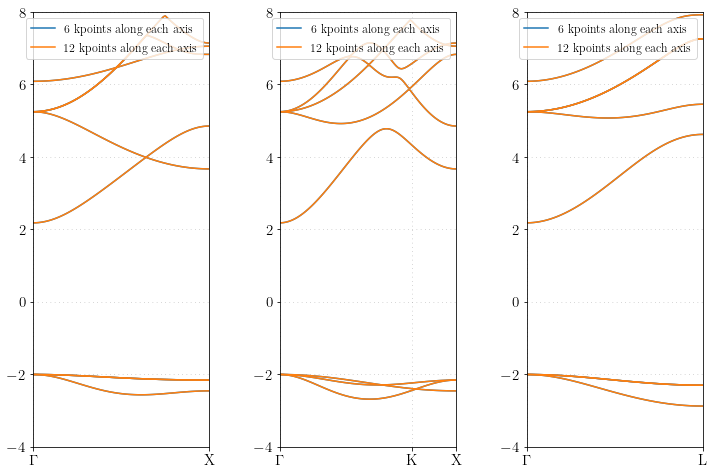

In [48]:
fig = plt.figure(figsize=(12, 8))

gs = gridspec.GridSpec(nrows=1, ncols=3, wspace=0.4, hspace=0.3)
#gs.update(hspace=0.1)

#####################################################################
# segment 1
ax = plt.subplot(gs[0])
# cutoff200
ax.plot(kpoints_kp666_seg1[:,0]*2.0*blat, band_kp666_seg1[0,:], linestyle='-', lw=1.5, 
        color='#1f77b4',
        label = r'6 kpoints along each axis')

for j in range(1,8):
    ax.plot(kpoints_kp666_seg1[:,0]*2.0*blat, band_kp666_seg1[j,:], linestyle='-', lw=1.5, 
        color='#1f77b4')

ax.plot(kpoints_kp121212_seg1[:,0]*2.0*blat, band_kp121212_seg1[0,:], linestyle='-', lw=1.5, 
        color='#ff7f0e',
        label = r'12 kpoints along each axis')

for j in range(1,8):
    ax.plot(kpoints_kp121212_seg1[:,0]*2.0*blat, band_kp121212_seg1[j,:], linestyle='-', lw=1.5, 
        color='#ff7f0e')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.0000, 0.5*2.0*blat])
ax.set_xticklabels([r"$\Gamma$", "X"])

ax.set_xlim(0.0, 0.5*2.0*blat)
ax.set_ylim(-4.0, 8.0)

#ax.set_ylabel(r'frequency [cm$^{-1}$]')
ax.legend(loc="upper right")


#####################################################################
# segment 2
ax = plt.subplot(gs[1])
# cutoff200
ax.plot(kpoints_kp666_seg2[:,0]*blat*np.sqrt(8), band_kp666_seg2[0,:], linestyle='-', lw=1.5, 
        color='#1f77b4',
        label = r'6 kpoints along each axis')

for j in range(1,8):
    ax.plot(kpoints_kp666_seg2[:,0]*blat*np.sqrt(8), band_kp666_seg2[j,:], linestyle='-', lw=1.5, 
        color='#1f77b4')

ax.plot(kpoints_kp121212_seg2[:,0]*blat*np.sqrt(8), band_kp121212_seg2[0,:], linestyle='-', lw=1.5, 
        color='#ff7f0e',
        label = r'12 kpoints along each axis')

for j in range(1,8):
    ax.plot(kpoints_kp121212_seg2[:,0]*blat*np.sqrt(8), band_kp121212_seg2[j,:], linestyle='-', lw=1.5, 
        color='#ff7f0e')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.0000, 0.5*blat*np.sqrt(8)*0.75, 0.5*blat*np.sqrt(8)])
ax.set_xticklabels([r"$\Gamma$", "K", "X"])

ax.set_xlim(0.0, 0.5*blat*np.sqrt(8))
ax.set_ylim(-4.0, 8.0)

#ax.set_ylabel(r'frequency [cm$^{-1}$]')
ax.legend(loc="upper right")



#####################################################################
# segment 3
ax = plt.subplot(gs[2])
# cutoff200
ax.plot(kpoints_kp666_seg3[:,0]*blat*np.sqrt(3), band_kp666_seg3[0,:], linestyle='-', lw=1.5, 
        color='#1f77b4',
        label = r'6 kpoints along each axis')

for j in range(1,8):
    ax.plot(kpoints_kp666_seg3[:,0]*blat*np.sqrt(3), band_kp666_seg3[j,:], linestyle='-', lw=1.5, 
        color='#1f77b4')

ax.plot(kpoints_kp121212_seg3[:,0]*blat*np.sqrt(3), band_kp121212_seg3[0,:], linestyle='-', lw=1.5, 
        color='#ff7f0e',
        label = r'12 kpoints along each axis')

for j in range(1,8):
    ax.plot(kpoints_kp121212_seg3[:,0]*blat*np.sqrt(3), band_kp121212_seg3[j,:], linestyle='-', lw=1.5, 
        color='#ff7f0e')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.0000, 0.5*blat*np.sqrt(3)])
ax.set_xticklabels([r"$\Gamma$", "L"])

ax.set_xlim(0.0, 0.5*blat*np.sqrt(3))
ax.set_ylim(-4.0, 8.0)
#ax.set_ylabel(r'frequency [cm$^{-1}$]')
ax.legend(loc="upper right")

fig.savefig("2_Electronic_band_structure.pdf")

In [49]:
# The summary of calculation details
comp_time_banddispersion = np.loadtxt("../2_band_structure/analysis/comp_time.txt")
comp_time_banddispersion
df_comptime_band = pd.DataFrame(comp_time_banddispersion, columns = ["kpoints along each axis", "elapsed time [s]"])
df_comptime_band["num of cores"] = 16
df_comptime_band["cutoff [eV]"] = 600

df_comptime_band= df_comptime_band[["kpoints along each axis", "cutoff [eV]", "num of cores", "elapsed time [s]"]]

df_comptime_band["computational time [cores*hours]"] = df_comptime_band["num of cores"]*df_comptime_band["elapsed time [s]"]/3600.0

df_comptime_band

,kpoints along each axis,cutoff [eV],num of cores,elapsed time [s],computational time [cores*hours]
0,6.0,600,16,50.167,0.222964
1,12.0,600,16,80.496,0.357760


In [50]:
# write band dispersion to excel file

##############################################################################
# segment 1
kpoints_kp666_scaled_seg1 = kpoints_kp666_seg1[:,0]/kpoints_kp666_seg1[-1,0]
kpoints_kp666_scaled_seg1.resize([1,101])

el_band_seg1 = np.concatenate([kpoints_kp666_scaled_seg1, band_kp666_seg1])
el_band_seg1 = el_band_seg1.T
el_band_seg1

df_el_band_seg1 = pd.DataFrame(el_band_seg1,columns = ["q", "E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8"])
#df_el_band_seg1.to_excel("result/2_electronic_structure/band_structure.xlsx", sheet_name="segment 1 (G-X)")

##############################################################################
# segment 2
kpoints_kp666_scaled_seg2 = kpoints_kp666_seg2[:,0]/kpoints_kp666_seg2[-1,0]
kpoints_kp666_scaled_seg2.resize([1,101])

el_band_seg2 = np.concatenate([kpoints_kp666_scaled_seg2, band_kp666_seg2])
el_band_seg2 = el_band_seg2.T
el_band_seg2

df_el_band_seg2 = pd.DataFrame(el_band_seg2,columns = ["q", "E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8"])
# df_el_band_seg2.to_excel("result/2_electronic_structure/band_structure.xlsx", sheet_name="segment 2 (G-K-X)")

##############################################################################
# segment 3
kpoints_kp666_scaled_seg3 = kpoints_kp666_seg3[:,0]/kpoints_kp666_seg3[-1,0]
kpoints_kp666_scaled_seg3.resize([1,101])

el_band_seg3 = np.concatenate([kpoints_kp666_scaled_seg3, band_kp666_seg3])
el_band_seg3 = el_band_seg3.T
el_band_seg3

df_el_band_seg3 = pd.DataFrame(el_band_seg3,columns = ["q", "E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8"])
# df_el_band_seg3.to_excel("result/2_electronic_structure/band_structure.xlsx", sheet_name="segment 3 (G-L)")



with pd.ExcelWriter('result/2_electronic_structure/band_structure.xlsx') as writer:
    df_el_band_seg1.to_excel(writer, sheet_name="segment 1 (G-X)")
    df_el_band_seg2.to_excel(writer, sheet_name="segment 2 (G-K-X)")
    df_el_band_seg3.to_excel(writer, sheet_name="segment 3 (G-L)")

In [51]:
np.shape(kpoints_kp666_scaled_seg2)

(1, 101)

In [52]:
np.shape(band_kp666_seg2)

(8, 101)

## 3 Harmonic - convergence at G, X, and L points

The phonon frequencies at Gamma (0,0,0), X(0.5, 0.5, 0), and L(0.5, 0.5, 0.5) points are calculated using the following conditions:

- displacement magnitude : 0.01 Angstrom
- make full use of symmetry (permutation, space group)
- consider ASR as constraint
- Fit displacement-force dataset by ordinary least squares
- standard atomic masses
- long-range Coulomb corrections: Ewald method (NONANALYTIC = 3 in ALAMODE)



The results of convergence check with respect to wavefunction cutoff (`ENCUT`), the number of kpoints along each axis, and the size of the supercell are shown in the tables and figures. 
From the result of these convergence checks, we have concluded that the following settings generates well converged harmonic phonon dispersion.

- 2x2x2 conventional supercell (64 atoms)
- wavefunction cutoff(ENCUT) : 300 eV
- kpoints in DFT calculation : 2 x 2 x 2

The calculation results regarding the converged harmonic phonon dispersion is summarized in `result/3_harmonic_phonon` folder.

- phonon dispersion on high-symmetry lines (segment 1~3) : phband.xlsx
- harmonic force constants: RbBr222.xml
- Dielectric matrix and Born effective charges: RbBr.born

### Convergence check with respect to 'ENCUT'

The convergence of phonon frequencies with respect to `ENCUT` is tested.
We use 4x4x4 Monkhorst-Pack kmesh with zero shift.

As shown in the figures and tables below, the target accuracy 0.1 THz is achieved at with `ENCUT` = 200 eV.  

We use
* `ENCUT` = 300 eV

in the following calculations.

In [53]:
# load calculation results
sc222_cutoff200_kp444_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff200/222supercell_kpoints444/RbBr_seg1.bands')
sc222_cutoff200_kp444_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff200/222supercell_kpoints444/RbBr_seg2.bands')
sc222_cutoff200_kp444_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff200/222supercell_kpoints444/RbBr_seg3.bands')

sc222_cutoff300_kp444_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints444/RbBr_seg1.bands')
sc222_cutoff300_kp444_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints444/RbBr_seg2.bands')
sc222_cutoff300_kp444_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints444/RbBr_seg3.bands')

sc222_cutoff400_kp444_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff400/222supercell_kpoints444/RbBr_seg1.bands')
sc222_cutoff400_kp444_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff400/222supercell_kpoints444/RbBr_seg2.bands')
sc222_cutoff400_kp444_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff400/222supercell_kpoints444/RbBr_seg3.bands')

sc222_cutoff500_kp444_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff500/222supercell_kpoints444/RbBr_seg1.bands')
sc222_cutoff500_kp444_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff500/222supercell_kpoints444/RbBr_seg2.bands')
sc222_cutoff500_kp444_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff500/222supercell_kpoints444/RbBr_seg3.bands')

sc222_cutoff600_kp444_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints444/RbBr_seg1.bands')
sc222_cutoff600_kp444_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints444/RbBr_seg2.bands')
sc222_cutoff600_kp444_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints444/RbBr_seg3.bands')

sc222_cutoff800_kp444_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff800/222supercell_kpoints444/RbBr_seg1.bands')
sc222_cutoff800_kp444_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff800/222supercell_kpoints444/RbBr_seg2.bands')
sc222_cutoff800_kp444_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff800/222supercell_kpoints444/RbBr_seg3.bands')



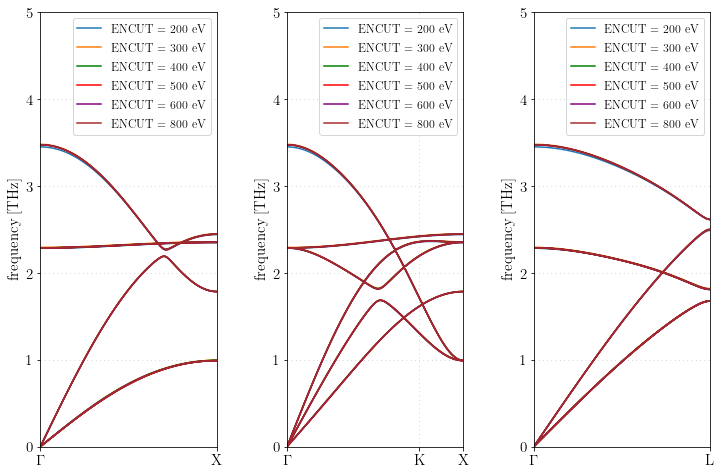

In [54]:
fig = plt.figure(figsize=(12, 8))

gs = gridspec.GridSpec(nrows=1, ncols=3, wspace=0.4, hspace=0.3)
#gs.update(hspace=0.1)

#####################################################################
# segment 1
ax = plt.subplot(gs[0])
# ENCUT 200 eV
ax.plot(sc222_cutoff200_kp444_seg1[:,0], sc222_cutoff200_kp444_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4',
        label = r'ENCUT = 200 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff200_kp444_seg1[:,0], sc222_cutoff200_kp444_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4')

# ENCUT 300 eV
ax.plot(sc222_cutoff300_kp444_seg1[:,0], sc222_cutoff300_kp444_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e',
        label = r'ENCUT = 300 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp444_seg1[:,0], sc222_cutoff300_kp444_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e')

# ENCUT 400 eV
ax.plot(sc222_cutoff400_kp444_seg1[:,0], sc222_cutoff400_kp444_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='green',
        label = r'ENCUT = 400 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff400_kp444_seg1[:,0], sc222_cutoff400_kp444_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='green')


# ENCUT 500 eV
ax.plot(sc222_cutoff500_kp444_seg1[:,0], sc222_cutoff500_kp444_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='red',
        label = r'ENCUT = 500 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff500_kp444_seg1[:,0], sc222_cutoff500_kp444_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='red')


# ENCUT 600 eV
ax.plot(sc222_cutoff600_kp444_seg1[:,0], sc222_cutoff600_kp444_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='purple',
        label = r'ENCUT = 600 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff600_kp444_seg1[:,0], sc222_cutoff600_kp444_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='purple')
    
# ENCUT 800 eV
ax.plot(sc222_cutoff800_kp444_seg1[:,0], sc222_cutoff800_kp444_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='brown',
        label = r'ENCUT = 800 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff800_kp444_seg1[:,0], sc222_cutoff800_kp444_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='brown')
    
ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.0000, 0.473492])
ax.set_xticklabels([r"$\Gamma$", "X"])

ax.set_xlim(0.0, 0.473492)
ax.set_ylim(0.0, 5.0)
ax.set_ylabel(r'frequency [THz]')
ax.legend()

#####################################################################
# segment 2
ax = plt.subplot(gs[1])
# ENCUT 200 eV
ax.plot(sc222_cutoff200_kp444_seg2[:,0], sc222_cutoff200_kp444_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4',
        label = r'ENCUT = 200 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff200_kp444_seg2[:,0], sc222_cutoff200_kp444_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4')

# ENCUT 300 eV
ax.plot(sc222_cutoff300_kp444_seg2[:,0], sc222_cutoff300_kp444_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e',
        label = r'ENCUT = 300 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp444_seg2[:,0], sc222_cutoff300_kp444_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e')

# ENCUT 400 eV
ax.plot(sc222_cutoff400_kp444_seg2[:,0], sc222_cutoff400_kp444_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='green',
        label = r'ENCUT = 400 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff400_kp444_seg2[:,0], sc222_cutoff400_kp444_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='green')


# ENCUT 500 eV
ax.plot(sc222_cutoff500_kp444_seg2[:,0], sc222_cutoff500_kp444_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='red',
        label = r'ENCUT = 500 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff500_kp444_seg2[:,0], sc222_cutoff500_kp444_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='red')


# ENCUT 600 eV
ax.plot(sc222_cutoff600_kp444_seg2[:,0], sc222_cutoff600_kp444_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='purple',
        label = r'ENCUT = 600 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff600_kp444_seg2[:,0], sc222_cutoff600_kp444_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='purple')
    
# ENCUT 800 eV
ax.plot(sc222_cutoff800_kp444_seg2[:,0], sc222_cutoff800_kp444_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='brown',
        label = r'ENCUT = 800 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff800_kp444_seg2[:,0], sc222_cutoff800_kp444_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='brown')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.000000, 0.502215, 0.669620])
ax.set_xticklabels([r"$\Gamma$", "K", "X"])

ax.set_xlim(0.0, 0.669620)
ax.set_ylim(0.0, 5.0)
ax.set_ylabel(r'frequency [THz]')
ax.legend()

#####################################################################
# segment 3
ax = plt.subplot(gs[2])
# ENCUT 200 eV
ax.plot(sc222_cutoff200_kp444_seg3[:,0], sc222_cutoff200_kp444_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4',
        label = r'ENCUT = 200 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff200_kp444_seg3[:,0], sc222_cutoff200_kp444_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4')

# ENCUT 300 eV
ax.plot(sc222_cutoff300_kp444_seg3[:,0], sc222_cutoff300_kp444_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e',
        label = r'ENCUT = 300 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp444_seg3[:,0], sc222_cutoff300_kp444_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e')

# ENCUT 400 eV
ax.plot(sc222_cutoff400_kp444_seg3[:,0], sc222_cutoff400_kp444_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='green',
        label = r'ENCUT = 400 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff400_kp444_seg3[:,0], sc222_cutoff400_kp444_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='green')


# ENCUT 500 eV
ax.plot(sc222_cutoff500_kp444_seg3[:,0], sc222_cutoff500_kp444_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='red',
        label = r'ENCUT = 500 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff500_kp444_seg3[:,0], sc222_cutoff500_kp444_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='red')


# ENCUT 600 eV
ax.plot(sc222_cutoff600_kp444_seg3[:,0], sc222_cutoff600_kp444_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='purple',
        label = r'ENCUT = 600 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff600_kp444_seg3[:,0], sc222_cutoff600_kp444_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='purple')
    
# ENCUT 800 eV
ax.plot(sc222_cutoff800_kp444_seg3[:,0], sc222_cutoff800_kp444_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='brown',
        label = r'ENCUT = 800 eV')

for j in range(2,7):
    ax.plot(sc222_cutoff800_kp444_seg3[:,0], sc222_cutoff800_kp444_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='brown')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.000000, 0.410057])
ax.set_xticklabels([r"$\Gamma$", "L"])

ax.set_xlim(0.0, 0.410057)
ax.set_ylim(0.0, 5.0)
ax.set_ylabel(r'frequency [THz]')
ax.legend(loc="upper right")

fig.savefig("3_1_ENCUT_harmonic_dispersion.pdf")

The phonon dispersion is convergent with `ENCUT` $\geq 300$ eV, which is confirmed by checking the frequencies at high symmetry points.

In [55]:
def read_high_symm_freq(kpoints, ENCUT, seg1, seg2, seg3):
    array_tmp = np.zeros(12)
    array_tmp[0] = float(kpoints)
    array_tmp[1] = float(ENCUT)
    array_tmp[2] = seg1[0,4]/THz_to_kayser/(2.0*np.pi) #f_G1
    array_tmp[3] = seg1[0,6]/THz_to_kayser/(2.0*np.pi) #f_G2
    array_tmp[4] = seg1[100,1]/THz_to_kayser/(2.0*np.pi) #f_X1
    array_tmp[5] = seg1[100,3]/THz_to_kayser/(2.0*np.pi) #f_X2
    array_tmp[6] = seg1[100,4]/THz_to_kayser/(2.0*np.pi) #f_X3
    array_tmp[7] = seg1[100,6]/THz_to_kayser/(2.0*np.pi) #f_X4
    array_tmp[8] = seg1[100,1]/THz_to_kayser/(2.0*np.pi) #f_L1
    array_tmp[9] = seg3[100,3]/THz_to_kayser/(2.0*np.pi) #f_L2
    array_tmp[10] = seg3[100,5]/THz_to_kayser/(2.0*np.pi) #f_L3
    array_tmp[11] = seg3[100,6]/THz_to_kayser/(2.0*np.pi) #f_L4
    
    return array_tmp



In [56]:
# summarize data
# kpoints along each axis, cutoff [eV], f_G1, f_G2, f_X1, f_X2, f_X3, f_X4, f_L1, f_L2, f_L3, f_L4
data_cutoff_harm_freq = np.zeros((6,12))

# cutoff 200
data_cutoff_harm_freq[0] = read_high_symm_freq(4, 200.0, sc222_cutoff200_kp444_seg1, 
                                               sc222_cutoff200_kp444_seg2, sc222_cutoff200_kp444_seg3)

data_cutoff_harm_freq[1] = read_high_symm_freq(4, 300.0, sc222_cutoff300_kp444_seg1, 
                                               sc222_cutoff300_kp444_seg2, sc222_cutoff300_kp444_seg3)

data_cutoff_harm_freq[2] = read_high_symm_freq(4, 400.0, sc222_cutoff400_kp444_seg1, 
                                               sc222_cutoff400_kp444_seg2, sc222_cutoff400_kp444_seg3)

data_cutoff_harm_freq[3] = read_high_symm_freq(4, 500.0, sc222_cutoff500_kp444_seg1, 
                                               sc222_cutoff500_kp444_seg2, sc222_cutoff500_kp444_seg3)

data_cutoff_harm_freq[4] = read_high_symm_freq(4, 600.0, sc222_cutoff600_kp444_seg1, 
                                               sc222_cutoff600_kp444_seg2, sc222_cutoff600_kp444_seg3)

data_cutoff_harm_freq[5] = read_high_symm_freq(4, 800.0, sc222_cutoff800_kp444_seg1, 
                                               sc222_cutoff800_kp444_seg2, sc222_cutoff800_kp444_seg3)


df_cutoff_harmonic_freq = pd.DataFrame(data_cutoff_harm_freq, columns = ["kpoints along each axis", "cutoff [eV]", "f_G1 [THz]", "f_G2 [THz]", 
                                                           "f_X1 [THz]", "f_X2 [THz]", "f_X3 [THz]", "f_X4 [THz]", 
                                                           "f_L1 [THz]", "f_L2 [THz]", "f_L3 [THz]", "f_L4 [THz]"])
df_cutoff_harmonic_freq


,kpoints along each axis,cutoff [eV],f_G1 [THz],f_G2 [THz],f_X1 [THz],f_X2 [THz],f_X3 [THz],f_X4 [THz],f_L1 [THz],f_L2 [THz],f_L3 [THz],f_L4 [THz]
0,4.0,200.0,2.279835,3.445062,0.987961,1.779863,2.344817,2.436541,0.987961,1.804799,2.484916,2.608683
1,4.0,300.0,2.288540,3.474819,0.992052,1.783666,2.353007,2.446260,0.992052,1.815443,2.500516,2.610815
2,4.0,400.0,2.284566,3.469165,0.990257,1.782981,2.349312,2.442584,0.990257,1.810573,2.497394,2.610433
3,4.0,500.0,2.283051,3.469075,0.986587,1.780902,2.347305,2.440321,0.986587,1.806549,2.493952,2.610324
4,4.0,600.0,2.284083,3.469666,0.987697,1.781557,2.348336,2.441277,0.987697,1.808333,2.495152,2.610460
5,4.0,800.0,2.283803,3.469423,0.987260,1.781399,2.348173,2.441238,0.987260,1.807629,2.494903,2.610293


### Convergence check with respect to 'kpoints along each axis'

The convergence of phonon frequencies with respect to the number of kpoints along each axis is tested.
`ENCUT` is fixed to be 300 eV.
We use Monkhorst-Pack kmesh with shift 0.0 0.0 0.0

The phonon dispersion is only slightly improved when we increase the density of kpoints in the DFT calculations.
The accuracy is much higher than the target accuracy 0.1 THz with a relatively coarse 2x2x2 kmesh. Therefore, we use
* 2x2x2 kmesh for DFT calculations

in the following calculations.


The phonon frequencies at high symmetry points with different kmesh density is as shown in the table below.

In [57]:
# load phonon dispersions
sc222_cutoff300_kp222_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints222/RbBr_seg1.bands')
sc222_cutoff300_kp222_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints222/RbBr_seg2.bands')
sc222_cutoff300_kp222_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints222/RbBr_seg3.bands')

sc222_cutoff300_kp444_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints444/RbBr_seg1.bands')
sc222_cutoff300_kp444_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints444/RbBr_seg2.bands')
sc222_cutoff300_kp444_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints444/RbBr_seg3.bands')

sc222_cutoff300_kp666_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints666/RbBr_seg1.bands')
sc222_cutoff300_kp666_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints666/RbBr_seg2.bands')
sc222_cutoff300_kp666_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints666/RbBr_seg3.bands')

sc222_cutoff300_kp888_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints888/RbBr_seg1.bands')
sc222_cutoff300_kp888_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints888/RbBr_seg2.bands')
sc222_cutoff300_kp888_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints888/RbBr_seg3.bands')




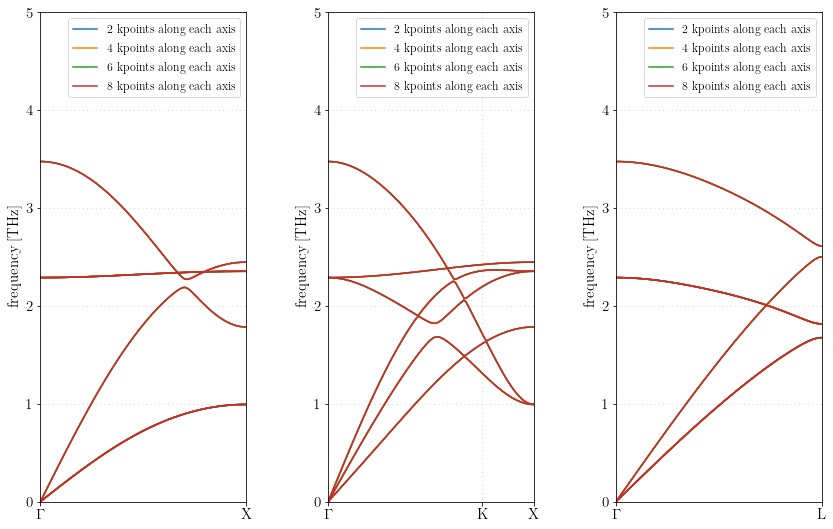

In [58]:
fig = plt.figure(figsize=(14, 9))

gs = gridspec.GridSpec(nrows=1, ncols=3, wspace=0.4, hspace=0.3)
#gs.update(hspace=0.1)

#####################################################################
# segment 1
ax = plt.subplot(gs[0])
# 222 kpoints
ax.plot(sc222_cutoff300_kp222_seg1[:,0], sc222_cutoff300_kp222_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4',
        label = r'2 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp222_seg1[:,0], sc222_cutoff300_kp222_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4')

# 444 kpoints
ax.plot(sc222_cutoff300_kp444_seg1[:,0], sc222_cutoff300_kp444_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e',
        label = r'4 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp444_seg1[:,0], sc222_cutoff300_kp444_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e')
    
# 666 kpoints

ax.plot(sc222_cutoff300_kp666_seg1[:,0], sc222_cutoff300_kp666_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#2ca02c',
        label = r'6 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp666_seg1[:,0], sc222_cutoff300_kp666_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#2ca02c')


# 888 kpoints
ax.plot(sc222_cutoff300_kp888_seg1[:,0], sc222_cutoff300_kp888_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#d62728',
        label = r'8 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp888_seg1[:,0], sc222_cutoff300_kp888_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#d62728')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.0000, 0.473492])
ax.set_xticklabels([r"$\Gamma$", "X"])

ax.set_xlim(0.0, 0.473492)
ax.set_ylim(0.0, 5.0)
ax.set_ylabel(r'frequency [THz]')
ax.legend()

#####################################################################
# segment 2
ax = plt.subplot(gs[1])
# 222 kpoints
ax.plot(sc222_cutoff300_kp222_seg2[:,0], sc222_cutoff300_kp222_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4',
        label = r'2 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp222_seg2[:,0], sc222_cutoff300_kp222_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4')

# 444 kpoints
ax.plot(sc222_cutoff300_kp444_seg2[:,0], sc222_cutoff300_kp444_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e',
        label = r'4 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp444_seg2[:,0], sc222_cutoff300_kp444_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e')

    
# 666 kpoints
ax.plot(sc222_cutoff300_kp666_seg2[:,0], sc222_cutoff300_kp666_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#2ca02c',
        label = r'6 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp666_seg2[:,0], sc222_cutoff300_kp666_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#2ca02c')
    
# 888 kpoints
ax.plot(sc222_cutoff300_kp888_seg2[:,0], sc222_cutoff300_kp888_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#d62728',
        label = r'8 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp888_seg2[:,0], sc222_cutoff300_kp888_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#d62728')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.000000, 0.502215, 0.669620])
ax.set_xticklabels([r"$\Gamma$", "K", "X"])

ax.set_xlim(0.0, 0.669620)
ax.set_ylim(0.0, 5.0)
ax.set_ylabel(r'frequency [THz]')
ax.legend()

#####################################################################
# segment 3
ax = plt.subplot(gs[2])
# 222 kpoints
ax.plot(sc222_cutoff300_kp222_seg3[:,0], sc222_cutoff300_kp222_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4',
        label = r'2 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp222_seg3[:,0], sc222_cutoff300_kp222_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4')

# 444 kpoints
ax.plot(sc222_cutoff300_kp444_seg3[:,0], sc222_cutoff300_kp444_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e',
        label = r'4 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp444_seg3[:,0], sc222_cutoff300_kp444_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e')

# 666 kpoints
ax.plot(sc222_cutoff300_kp666_seg3[:,0], sc222_cutoff300_kp666_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#2ca02c',
        label = r'6 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp666_seg3[:,0], sc222_cutoff300_kp666_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#2ca02c')


    
# 888 kpoints
ax.plot(sc222_cutoff300_kp888_seg3[:,0], sc222_cutoff300_kp888_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#d62728',
        label = r'8 kpoints along each axis')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp888_seg3[:,0], sc222_cutoff300_kp888_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#d62728')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.000000, 0.410057])
ax.set_xticklabels([r"$\Gamma$", "L"])

ax.set_xlim(0.0, 0.410057)
ax.set_ylim(0.0, 5.0)
ax.set_ylabel(r'frequency [THz]')
ax.legend(loc="upper right")



fig.savefig("3_2_kpoints_harmonic_dispersion.pdf")

In [59]:
# summarize data
# kpoints along each axis, cutoff [eV], f_G1, f_G2, f_X1, f_X2, f_X3, f_X4, f_L1, f_L2, f_L3, f_L4
data_cutoff300_kpoints_harm_freq = np.zeros((4,12))

# cutoff 200
data_cutoff300_kpoints_harm_freq[0] = read_high_symm_freq(2, 300.0, sc222_cutoff300_kp222_seg1, 
                                               sc222_cutoff300_kp222_seg2, sc222_cutoff300_kp222_seg3)

data_cutoff300_kpoints_harm_freq[1] = read_high_symm_freq(4, 300.0, sc222_cutoff300_kp444_seg1, 
                                               sc222_cutoff300_kp444_seg2, sc222_cutoff300_kp444_seg3)

data_cutoff300_kpoints_harm_freq[2] = read_high_symm_freq(6, 300.0, sc222_cutoff300_kp666_seg1, 
                                               sc222_cutoff300_kp666_seg2, sc222_cutoff300_kp666_seg3)

data_cutoff300_kpoints_harm_freq[3] = read_high_symm_freq(8, 300.0, sc222_cutoff300_kp888_seg1, 
                                               sc222_cutoff300_kp888_seg2, sc222_cutoff300_kp888_seg3)

df_cutoff300_kpoints_harm_freq = pd.DataFrame(data_cutoff300_kpoints_harm_freq, columns = ["kpoints along each axis", "cutoff [eV]", "f_G1 [THz]", "f_G2 [THz]", 
                                                           "f_X1 [THz]", "f_X2 [THz]", "f_X3 [THz]", "f_X4 [THz]", 
                                                           "f_L1 [THz]", "f_L2 [THz]", "f_L3 [THz]", "f_L4 [THz]"])

df_cutoff300_kpoints_harm_freq


,kpoints along each axis,cutoff [eV],f_G1 [THz],f_G2 [THz],f_X1 [THz],f_X2 [THz],f_X3 [THz],f_X4 [THz],f_L1 [THz],f_L2 [THz],f_L3 [THz],f_L4 [THz]
0,2.0,300.0,2.288371,3.474709,0.992039,1.783606,2.352909,2.446224,0.992039,1.815420,2.500469,2.610987
1,4.0,300.0,2.288540,3.474819,0.992052,1.783666,2.353007,2.446260,0.992052,1.815443,2.500516,2.610815
2,6.0,300.0,2.288528,3.474810,0.992107,1.783661,2.353016,2.446282,0.992107,1.815435,2.500521,2.610914
3,8.0,300.0,2.288513,3.474801,0.992142,1.783650,2.353004,2.446249,0.992142,1.815447,2.500456,2.610942


### Convergence check with respect to supercell size

The convergence of phonon frequencies with respect to the supercell size is tested with following conditions
- `ENCUT` is 300 eV
- 4x4x4 Monkhorst kmesh for DFT calculations


In [60]:
# load phonon dispersions
sc333_cutoff300_kp444_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/333supercell_kpoints444/RbBr_seg1.bands')
sc333_cutoff300_kp444_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/333supercell_kpoints444/RbBr_seg2.bands')
sc333_cutoff300_kp444_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/333supercell_kpoints444/RbBr_seg3.bands')


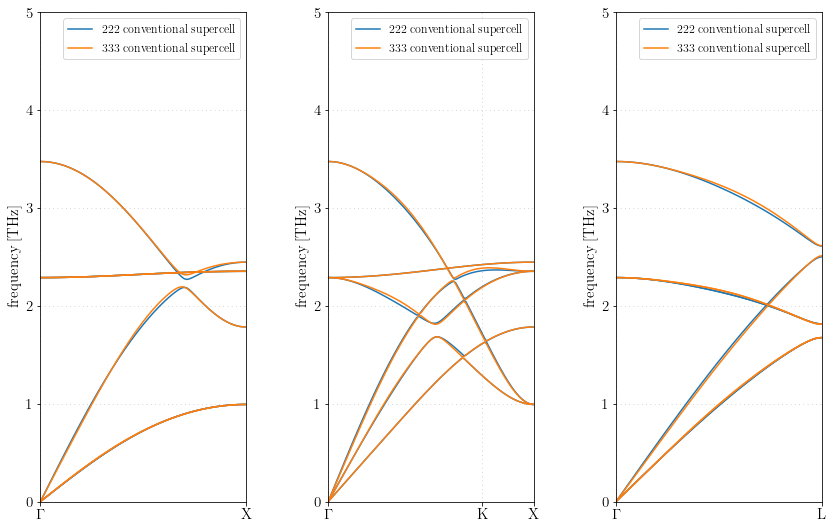

In [61]:
fig = plt.figure(figsize=(14, 9))

gs = gridspec.GridSpec(nrows=1, ncols=3, wspace=0.4, hspace=0.3)
#gs.update(hspace=0.1)

#####################################################################
# segment 1
ax = plt.subplot(gs[0])
# 222 supercell
ax.plot(sc222_cutoff300_kp444_seg1[:,0], sc222_cutoff300_kp444_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4',
        label = r'222 conventional supercell')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp444_seg1[:,0], sc222_cutoff300_kp444_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4')

# 333 supercell
ax.plot(sc333_cutoff300_kp444_seg1[:,0], sc333_cutoff300_kp444_seg1[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e',
        label = r'333 conventional supercell')

for j in range(2,7):
    ax.plot(sc333_cutoff300_kp444_seg1[:,0], sc333_cutoff300_kp444_seg1[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e')
    

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.0000, 0.473492])
ax.set_xticklabels([r"$\Gamma$", "X"])

ax.set_xlim(0.0, 0.473492)
ax.set_ylim(0.0, 5.0)
ax.set_ylabel(r'frequency [THz]')
ax.legend()

#####################################################################
# segment 2
ax = plt.subplot(gs[1])
# 222 supercell
ax.plot(sc333_cutoff300_kp444_seg2[:,0], sc333_cutoff300_kp444_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4',
        label = r'222 conventional supercell')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp444_seg2[:,0], sc222_cutoff300_kp444_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4')

# 333 supercell kpoints
ax.plot(sc333_cutoff300_kp444_seg2[:,0], sc333_cutoff300_kp444_seg2[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e',
        label = r'333 conventional supercell')

for j in range(2,7):
    ax.plot(sc333_cutoff300_kp444_seg2[:,0], sc333_cutoff300_kp444_seg2[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e')


ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.000000, 0.502215, 0.669620])
ax.set_xticklabels([r"$\Gamma$", "K", "X"])

ax.set_xlim(0.0, 0.669620)
ax.set_ylim(0.0, 5.0)
ax.set_ylabel(r'frequency [THz]')
ax.legend()

#####################################################################
# segment 3
ax = plt.subplot(gs[2])
# 222 kpoints
ax.plot(sc222_cutoff300_kp444_seg3[:,0], sc222_cutoff300_kp444_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4',
        label = r'222 conventional supercell')

for j in range(2,7):
    ax.plot(sc222_cutoff300_kp444_seg3[:,0], sc222_cutoff300_kp444_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#1f77b4')

# 444 kpoints
ax.plot(sc333_cutoff300_kp444_seg3[:,0], sc333_cutoff300_kp444_seg3[:,1]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e',
        label = r'333 conventional supercell')

for j in range(2,7):
    ax.plot(sc333_cutoff300_kp444_seg3[:,0], sc333_cutoff300_kp444_seg3[:,j]/THz_to_kayser/(2.0*np.pi), linestyle='-', ms = 10.0, lw=1.5, 
        color='#ff7f0e')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_xticks([ 0.000000, 0.410057])
ax.set_xticklabels([r"$\Gamma$", "L"])

ax.set_xlim(0.0, 0.410057)
ax.set_ylim(0.0, 5.0)
ax.set_ylabel(r'frequency [THz]')
ax.legend(loc="upper right")

fig.savefig("3_3_supercell_harmonic_dispersion.pdf")

In [62]:
data_supercell_harm_freq = np.zeros((2,12))

data_supercell_harm_freq[0] = read_high_symm_freq(4, 300, sc222_cutoff300_kp444_seg1, sc222_cutoff300_kp444_seg2, sc222_cutoff300_kp444_seg3)
data_supercell_harm_freq[1] = read_high_symm_freq(4, 300, sc333_cutoff300_kp444_seg1, sc333_cutoff300_kp444_seg2, sc333_cutoff300_kp444_seg3)

df_supercell_harm_freq = pd.DataFrame(data_supercell_harm_freq, columns = ["kpoints along each axis", "cutoff [eV]", "f_G1 [THz]", "f_G2 [THz]", 
                                                           "f_X1 [THz]", "f_X2 [THz]", "f_X3 [THz]", "f_X4 [THz]", 
                                                           "f_L1 [THz]", "f_L2 [THz]", "f_L3 [THz]", "f_L4 [THz]"])



df_supercell_harm_freq["supercell"] = ["222 conventional", "333 conventional"]
df_supercell_harm_freq

,kpoints along each axis,cutoff [eV],f_G1 [THz],f_G2 [THz],f_X1 [THz],f_X2 [THz],f_X3 [THz],f_X4 [THz],f_L1 [THz],f_L2 [THz],f_L3 [THz],f_L4 [THz],supercell
0,4.0,300.0,2.28854,3.474819,0.992052,1.783666,2.353007,2.446260,0.992052,1.815443,2.500516,2.610815,222 conventional
1,4.0,300.0,2.28842,3.474741,0.992087,1.783648,2.352937,2.446247,0.992087,1.812510,2.510916,2.614418,333 conventional


### Summary of convergence check of frequencies at high-symmetry point

The calculation results on the phonon frequencies at high-symmetry points and the computational times are summarized in the tables below.

In [63]:
# load data of phonon dispersion
sc222_cutoff600_kp222_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints222/RbBr_seg1.bands')
sc222_cutoff600_kp222_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints222/RbBr_seg2.bands')
sc222_cutoff600_kp222_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints222/RbBr_seg3.bands')

sc222_cutoff600_kp444_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints444/RbBr_seg1.bands')
sc222_cutoff600_kp444_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints444/RbBr_seg2.bands')
sc222_cutoff600_kp444_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints444/RbBr_seg3.bands')

sc222_cutoff600_kp888_seg1 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints888/RbBr_seg1.bands')
sc222_cutoff600_kp888_seg2 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints888/RbBr_seg2.bands')
sc222_cutoff600_kp888_seg3 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff600/222supercell_kpoints888/RbBr_seg3.bands')




In [64]:
data_cutoff600_kpoints_harm_freq = np.zeros((3,12))

data_cutoff600_kpoints_harm_freq[0] = read_high_symm_freq(2, 600, sc222_cutoff600_kp222_seg1, sc222_cutoff600_kp222_seg2, sc222_cutoff600_kp222_seg3)
data_cutoff600_kpoints_harm_freq[1] = read_high_symm_freq(4, 600, sc222_cutoff600_kp444_seg1, sc222_cutoff600_kp444_seg2, sc222_cutoff600_kp444_seg3)
data_cutoff600_kpoints_harm_freq[2] = read_high_symm_freq(8, 600, sc222_cutoff600_kp888_seg1, sc222_cutoff600_kp888_seg2, sc222_cutoff600_kp888_seg3)

df_cutoff600_kpoints_harm_freq = pd.DataFrame(data_cutoff600_kpoints_harm_freq, columns = ["kpoints along each axis", "cutoff [eV]", "f_G1 [THz]", "f_G2 [THz]", 
                                                           "f_X1 [THz]", "f_X2 [THz]", "f_X3 [THz]", "f_X4 [THz]", 
                                                           "f_L1 [THz]", "f_L2 [THz]", "f_L3 [THz]", "f_L4 [THz]"])





In [65]:
# summary
df_summary = pd.concat([df_cutoff_harmonic_freq, df_cutoff300_kpoints_harm_freq, df_cutoff600_kpoints_harm_freq])
df_summary["supercell"] = "222 conventional"
df_summary = pd.concat([df_summary, df_supercell_harm_freq])
df_summary

,kpoints along each axis,cutoff [eV],f_G1 [THz],f_G2 [THz],f_X1 [THz],f_X2 [THz],f_X3 [THz],f_X4 [THz],f_L1 [THz],f_L2 [THz],f_L3 [THz],f_L4 [THz],supercell
0,4.0,200.0,2.279835,3.445062,0.987961,1.779863,2.344817,2.436541,0.987961,1.804799,2.484916,2.608683,222 conventional
1,4.0,300.0,2.288540,3.474819,0.992052,1.783666,2.353007,2.446260,0.992052,1.815443,2.500516,2.610815,222 conventional
2,4.0,400.0,2.284566,3.469165,0.990257,1.782981,2.349312,2.442584,0.990257,1.810573,2.497394,2.610433,222 conventional
3,4.0,500.0,2.283051,3.469075,0.986587,1.780902,2.347305,2.440321,0.986587,1.806549,2.493952,2.610324,222 conventional
4,4.0,600.0,2.284083,3.469666,0.987697,1.781557,2.348336,2.441277,0.987697,1.808333,2.495152,2.610460,222 conventional
5,4.0,800.0,2.283803,3.469423,0.987260,1.781399,2.348173,2.441238,0.987260,1.807629,2.494903,2.610293,222 conventional
0,2.0,300.0,2.288371,3.474709,0.992039,1.783606,2.352909,2.446224,0.992039,1.815420,2.500469,2.610987,222 conventional
1,4.0,300.0,2.288540,3.474819,0.992052,1.783666,2.353007,2.446260,0.992052,1.815443,2.500516,2.610815,222 conventional
2,6.0,300.0,2.288528,3.474810,0.992107,1.783661,2.353016,2.446282,0.992107,1.815435,2.500521,2.610914,222 conventional
3,8.0,300.0,2.288513,3.474801,0.992142,1.783650,2.353004,2.446249,0.992142,1.815447,2.500456,2.610942,222 conventional


In [66]:
# Number of cores and computational times
harmonic_DFT_time = np.loadtxt('../3_harmonic_phonon/analysis/DFT_time.txt')

df_harmonic_DFT_time = pd.DataFrame(harmonic_DFT_time, columns = ["kpoints along each axis", "cutoff [eV]", 
                                                                  "number of cores", "total CPU time [s]"])


df_harmonic_DFT_time["supercell"] = "222 conventional"

df_harmonic_DFT_time.loc[12] = [4.0, 300.0, 36.0, 207009.36, "333 conventional"]

df_harmonic_DFT_time["computational time [cores*hours]"] = df_harmonic_DFT_time["number of cores"]*df_harmonic_DFT_time["total CPU time [s]"]/3600.0
#df_harmonic_DFT_time.loc[12] = [4.0, 300.0, "*36.0", 207009.36, "333 conventional"]


df_harmonic_DFT_time

,kpoints along each axis,cutoff [eV],number of cores,total CPU time [s],supercell,computational time [cores*hours]
0,4.0,200.0,16.0,5006.093,222 conventional,22.249302
1,4.0,300.0,16.0,17005.510,222 conventional,75.580044
2,4.0,400.0,16.0,33663.777,222 conventional,149.616787
3,4.0,600.0,16.0,33249.699,222 conventional,147.776440
4,4.0,800.0,16.0,72985.356,222 conventional,324.379360
5,2.0,300.0,16.0,6099.531,222 conventional,27.109027
6,4.0,300.0,16.0,17005.510,222 conventional,75.580044
7,6.0,300.0,16.0,30476.470,222 conventional,135.450978
8,8.0,300.0,16.0,35867.435,222 conventional,159.410822
9,2.0,600.0,16.0,24706.924,222 conventional,109.808551


The number of DFT runs is 2 for each calculation.

\* I am so sorry that the calculation in 3x3x3 supercell is run in a different computer because it took too long in the computer which is used for other calculations. Therefore, the computational time of the 3x3x3 conventional cell cannot be directly compared to the results of the 2x2x2 supercell.

In [67]:
# write to excel file
# write computational time to excel file
with pd.ExcelWriter('result/2_electronic_structure/summary.xlsx') as writer:
    df_harmonic_DFT_time.to_excel(writer, sheet_name="summary")



### IFCs in the real space 
The relationship between the atomic distances and the absolute values of finite IFCs are plotted.
The IFCs with large atomic distance close to the supercell size (around 26 Bohr) is small. This shows that the supercell used in the calculation is large enough, which is consistent with the previous calculation.

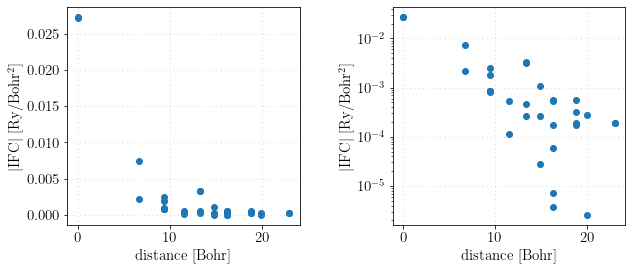

In [68]:
distance_IFC_sc222_cutoff300_kp444 = np.loadtxt('../3_harmonic_phonon/analysis/cutoff300/222supercell_kpoints444/distance_IFC.txt')

fig = plt.figure(figsize=(10, 4))

gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.4, hspace=0.3)
#gs.update(hspace=0.1)

#####################################################################
# real 
ax = plt.subplot(gs[0])

ax.scatter(distance_IFC_sc222_cutoff300_kp444[:,4], np.abs(distance_IFC_sc222_cutoff300_kp444[:,2]), 
          color='#1f77b4')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

#ax.set_xlim(0.0, 0.410057)
#ax.set_ylim(0.0, 120.0)
ax.set_xlabel(r'distance [Bohr]')
ax.set_ylabel(r'$|$IFC$|$ [Ry/Bohr$^2$]')

# semi-log plot
ax = plt.subplot(gs[1])

ax.scatter(distance_IFC_sc222_cutoff300_kp444[:,4], np.abs(distance_IFC_sc222_cutoff300_kp444[:,2]), 
          color='#1f77b4')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')
ax.set_yscale("log")

ax.set_xlabel(r'distance [Bohr]')
ax.set_ylabel(r'$|$IFC$|$ [Ry/Bohr$^2$]')

fig.savefig("3_4_atomic_distance_IFC.pdf")


In [69]:
# write band dispersion to excel file

##############################################################################
# segment 1
sc222_cutoff300_kp222_seg1_scaled = sc222_cutoff300_kp222_seg1.copy()
sc222_cutoff300_kp222_seg1_scaled[:,0] = sc222_cutoff300_kp222_seg1_scaled[:,0]/sc222_cutoff300_kp222_seg1[-1,0]
for i in range(1,7):
    sc222_cutoff300_kp222_seg1_scaled[:,i] = sc222_cutoff300_kp222_seg1[:,i]/THz_to_kayser/(2.0*np.pi)

df_haph_band_seg1 = pd.DataFrame(sc222_cutoff300_kp222_seg1_scaled,columns = ["q", "f1", "f2", "f3", "f4", "f5", "f6"])

##############################################################################
# segment 2
sc222_cutoff300_kp222_seg2_scaled = sc222_cutoff300_kp222_seg2.copy()
sc222_cutoff300_kp222_seg2_scaled[:,0] = sc222_cutoff300_kp222_seg2_scaled[:,0]/sc222_cutoff300_kp222_seg2[-1,0]
for i in range(1,7):
    sc222_cutoff300_kp222_seg2_scaled[:,i] = sc222_cutoff300_kp222_seg2[:,i]/THz_to_kayser/(2.0*np.pi)

df_haph_band_seg2 = pd.DataFrame(sc222_cutoff300_kp222_seg2_scaled,columns = ["q", "f1", "f2", "f3", "f4", "f5", "f6"])

##############################################################################
# segment 3
sc222_cutoff300_kp222_seg3_scaled = sc222_cutoff300_kp222_seg3.copy()
sc222_cutoff300_kp222_seg3_scaled[:,0] = sc222_cutoff300_kp222_seg3_scaled[:,0]/sc222_cutoff300_kp222_seg3[-1,0]
for i in range(1,7):
    sc222_cutoff300_kp222_seg3_scaled[:,i] = sc222_cutoff300_kp222_seg3[:,i]/THz_to_kayser/(2.0*np.pi)


df_haph_band_seg3 = pd.DataFrame(sc222_cutoff300_kp222_seg3_scaled,columns = ["q", "f1", "f2", "f3", "f4", "f5", "f6"])

with pd.ExcelWriter('result/3_harmonic_phonon/phband.xlsx') as writer:
    df_haph_band_seg1.to_excel(writer, sheet_name="segment 1 (G-X)")
    df_haph_band_seg2.to_excel(writer, sheet_name="segment 2 (G-K-X)")
    df_haph_band_seg3.to_excel(writer, sheet_name="segment 3 (G-L)")

## 4-1 Anharmonic thermal conductivity - convergence check with respect to the cutoff radius

The results of the convergence check with respect to the cutoff radius for the third-order IFC and the supercell size are shown in the table and figures below.

The force constants are calculated with the following methods:

- Finite displacements with magnitude of 0.03 Ang.
- Full space group symmetry considered
- Impose ASR as constraints
- Estimate third-order IFCs by ordinary least squares
- **When fitting the third-order IFCs, the second-order IFCs are fixed to the values obtained in the step 3.**

The thermal conductivity calculations are performed with the following conditions:

- 30x30x30 q points
- Use space group symmetry for reducing sampling q points and triplets (q, q', q'')
- Tetrahedron method (`ISMEAR = -1`) for delta function evaluation
- RTA
- We have checked that the default atomic masses agree with the values given in the checklist with the accuracy less than 0.001 u
- no ph-iso scattering, no ph-boundary effects
- Phonon group velocity is evaluated as $\boldsymbol{v}_{\boldsymbol{q}j} \approx (\omega_{\boldsymbol{q}+\Delta\boldsymbol{q}j} - \omega_{\boldsymbol{q}-\Delta\boldsymbol{q}j})/2\Delta\boldsymbol{q}$ where $\Delta\boldsymbol{q}$ is a small value (~0.001).


In [70]:
# load data of lattice constant calculation
cutoff_kl300K_MIC0 = np.loadtxt('../5_thermal_conductivity/analysis/cutoff/MIC0.txt')
calcdata_kl300K_anharm = np.loadtxt('../4_anharmonic_IFCs/analysis/comp_time_MIC0.txt')
calcdata_kl300K_MIC0 = np.loadtxt("../5_thermal_conductivity/analysis/cutoff/MIC0_comptime.txt")


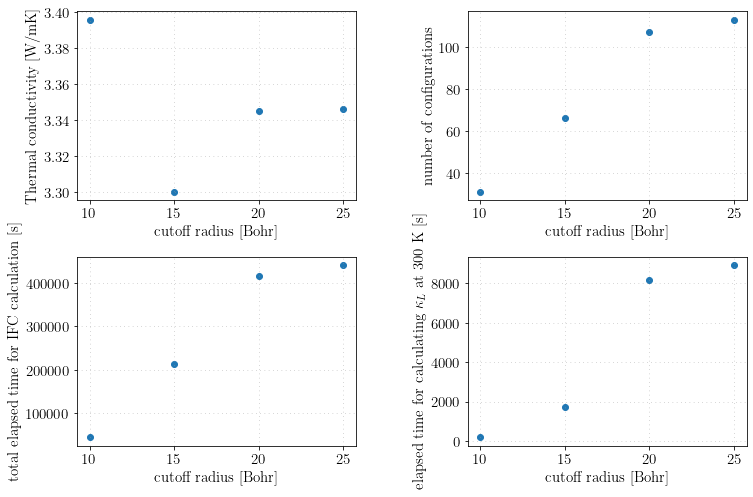

In [71]:

fig = plt.figure(figsize=(12, 8))

gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=0.4, hspace=0.3)
#gs.update(hspace=0.1)

#####################################################################
# cutoff radius and thermal conductivity at 300 K
ax = plt.subplot(gs[0])

ax.scatter(cutoff_kl300K_MIC0[:,0], np.abs(cutoff_kl300K_MIC0[:,1]), 
          color='#1f77b4')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

ax.set_xlabel(r'cutoff radius [Bohr]')
ax.set_ylabel(r'Thermal conductivity [W/mK]')
# ax.legend()

#####################################################################
# cutoff radius and number of confignurations 

ax = plt.subplot(gs[1])

ax.scatter(calcdata_kl300K_anharm[:,0], np.abs(calcdata_kl300K_anharm[:,1]), 
          color='#1f77b4')


ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

ax.set_xlabel(r'cutoff radius [Bohr]')
ax.set_ylabel(r'number of configurations')
#ax.legend()

##############################################################
# cutoff radius and computational time for IFC calcution
ax = plt.subplot(gs[2])

ax.scatter(calcdata_kl300K_anharm[:,0], np.abs(calcdata_kl300K_anharm[:,3]), 
          color='#1f77b4')


ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

ax.set_xlabel(r'cutoff radius [Bohr]')
ax.set_ylabel(r'total elapsed time for IFC calculation [s]')
#ax.legend()

##############################################################
# cutoff radius and computational time for thermal conductivity
ax = plt.subplot(gs[3])

ax.scatter(calcdata_kl300K_MIC0[:,0], np.abs(calcdata_kl300K_MIC0[:,1]), 
          color='#1f77b4')


ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

#ax.set_xlim(0.0, 0.410057)
#ax.set_ylim(0.0, 120.0)
ax.set_xlabel(r'cutoff radius [Bohr]')
ax.set_ylabel(r'elapsed time for calculating $\kappa_L$ at 300 K [s]')
#ax.legend()

fig.savefig("4_1_cutoff_kappaL.pdf")

In [72]:
df_calcdata_kl300K_anharm = pd.DataFrame(calcdata_kl300K_anharm, 
                                         columns = ["cutoff radius [Bohr]", "num. of configurations", 
                                                    "num. of cores", "total comp time for anharmonic IFCs [s]"])

df_calcdata_kl300K_MIC0 = pd.DataFrame(calcdata_kl300K_MIC0[:,1],
                                      columns = ["comp time for kappaL at 300 K [s]"])

df_calc_data_kl300K = pd.concat([df_calcdata_kl300K_anharm, df_calcdata_kl300K_MIC0], axis=1)

df_calc_data_kl300K["comp time for anharmonic IFCs [cores*hours]"] = df_calc_data_kl300K["num. of cores"]*df_calc_data_kl300K["total comp time for anharmonic IFCs [s]"]/3600.0
df_calc_data_kl300K["comp time for kappaL at 300 K [cores*hours]"] = df_calc_data_kl300K["num. of cores"]*df_calc_data_kl300K["comp time for kappaL at 300 K [s]"]/3600.0


df_calc_data_kl300K

,cutoff radius [Bohr],num. of configurations,num. of cores,total comp time for anharmonic IFCs [s],comp time for kappaL at 300 K [s],comp time for anharmonic IFCs [cores*hours],comp time for kappaL at 300 K [cores*hours]
0,10.0,31.0,16.0,44103.0,187.0,196.013333,0.831111
1,15.0,66.0,16.0,212672.0,1714.0,945.208889,7.617778
2,20.0,107.0,16.0,416962.0,8172.0,1853.164444,36.320000
3,25.0,113.0,16.0,440448.0,8903.0,1957.546667,39.568889


## 4-2 Anharmonic thermal conductivity - convergence check with respect to the number of kpoints

The convergence of $\kappa_{L}$ with respect to the q point density was examined using the following computational conditions:

- 2x2x2 conventional supercell
- cuoff radius of third-order force constants is 25.0 Bohr
- Increase q mesh from 10^3 to 50^3
- no isotope scattering
- $T$ = 300 K

The thermal conductivity $\kappa_L$ converges to $\kappa_L = 3.34 \sim 3.35 $ W/mK as the density of kmesh gets larger. The target accuracy (2 \% difference between successive grids) is achieved with 20x20x20 kmesh.  
In the production run, we use 30x30x30 kmesh, which produces a value much closer to the converged result.

In [73]:
kpoints_kappaL = np.loadtxt("../5_thermal_conductivity/analysis/kpoints/300K_kl.txt")
kpoints_kappaL_time = np.loadtxt("../5_thermal_conductivity/analysis/kpoints/300K_kl_comptime.txt")

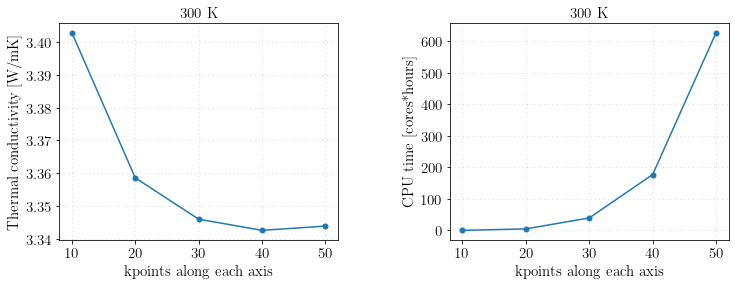

In [74]:
fig = plt.figure(figsize=(12, 4))

gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.4, hspace=0.3)
#gs.update(hspace=0.1)

#####################################################################
# number of kpoints and thermal conductivity at 300 K
ax = plt.subplot(gs[0])

ax.plot(kpoints_kappaL[:,0], kpoints_kappaL[:,1], marker = "o", ms = 5.0, color='#1f77b4')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

ax.set_xlabel(r'kpoints along each axis')
ax.set_ylabel(r'Thermal conductivity [W/mK]')
ax.set_title("300 K")

#####################################################################
# computation time
ax = plt.subplot(gs[1])

ax.plot(kpoints_kappaL_time[:,0], kpoints_kappaL_time[:,1]*16.0/3600.0, marker = "o", ms = 5.0, color='#1f77b4')

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

ax.set_xlabel(r'kpoints along each axis')
ax.set_ylabel(r'CPU time [cores*hours]')
ax.set_title("300 K")

fig.savefig("4_2_kpoints_kappaL.pdf")

In [75]:
kpoints_kappaL_summary = np.stack([kpoints_kappaL[:,0], kpoints_kappaL[:, 1], kpoints_kappaL_time[:,1]*16.0/3600.0])
kpoints_kappaL_summary = kpoints_kappaL_summary.T

df_kpoints_kappaL_summary = pd.DataFrame(kpoints_kappaL_summary, columns=["kpoints along each axis", "thermal conductivity at 300 K [W/mK]", "computational time [cores*hours]"])

df_kpoints_kappaL_summary

,kpoints along each axis,thermal conductivity at 300 K [W/mK],computational time [cores*hours]
0,10.0,3.4028,0.115556
1,20.0,3.3586,4.715556
2,30.0,3.3460,39.568889
3,40.0,3.3426,177.360000
4,50.0,3.3439,627.924444


## 4. Anharmonic - production run

After checking the convergence of kappa w.r.t. various parameters, I have chosen the following set of parameters for the production calculation.

- Lattice constant (Ang.) : 7.0221 Angstrom
- ENCUT = 300
- supercell: 222 conventional supercell
- Cutoff radius for IFC3 (bohr): 25.0 Bohr
- 30x30x30 q points
- tetrahedron method for delta function
- Mass of Rb: 85.467 u for $\kappa_{nat}$, 84.912 u for $\kappa_{pure}$.
- Mass of Br: 79.904 u for $\kappa_{nat}$, 78.918 u for $\kappa_{pure}$.

- isotope factor of Rb: 1.09653e-04 for $\kappa_{nat}$, 0 for $\kappa_{pure}$ 
- isotope factor of Br: 1.56286e-04 for $\kappa_{nat}$, 0 for $\kappa_{pure}$ 


The results of the production calculation are shown in the following tables/figures.

The CPU time for the thermal conductivity calculation is 
- pure: 30013 s with 16 cores (133.39 cores*hour)
- natural isotope: 25437 s with 16 cores (113.05 cores*hour)


Both calculations are run with 16 cores.

In [76]:
kappa_L_wo_isotope1 = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030/download/RbBr222_lowT.kl')
kappa_L_wo_isotope2 = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030/download/RbBr222_midT.kl')
kappa_L_wo_isotope3 = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030/download/RbBr222_highT.kl')

kappa_L_wo_isotope = np.concatenate([kappa_L_wo_isotope1, kappa_L_wo_isotope2, kappa_L_wo_isotope3])

kappa_L_w_isotope1 = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030_isotope/download/RbBr222_lowT.kl')
kappa_L_w_isotope2 = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030_isotope/download/RbBr222_midT.kl')
kappa_L_w_isotope3 = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030_isotope/download/RbBr222_highT.kl')

kappa_L_w_isotope = np.concatenate([kappa_L_w_isotope1, kappa_L_w_isotope2, kappa_L_w_isotope3])


mfp_cumlkappa_wo_isotope = np.loadtxt("../5_thermal_conductivity/analysis/kpoints303030/download/cumulative_300K.txt")
mfp_cumlkappa_w_isotope = np.loadtxt("../5_thermal_conductivity/analysis/kpoints303030_isotope/download/cumulative_300K.txt")

kappa_spec_wo_isotope = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030/download/RbBr222_midT_300K.kl_spec')
kappa_spec_w_isotope = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030_isotope/download/RbBr222_midT_300K.kl_spec')

freq_cumlkappa_wo_isotope = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030/download/RbBr222_300K_freq_cumkappa.txt')
freq_cumlkappa_w_isotope = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030_isotope/download/RbBr222_300K_freq_cumkappa.txt')


tau_wo_isotope = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030/download/tau_300K.txt')
tau_w_isotope = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030_isotope/download/tau_300K.txt')
tau_w_isotope_3ph = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030_isotope/download/tau_300K_wo_isotope.txt')


self_isotope = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030_isotope/download/RbBr222_midT.self_isotope')



<ipython-input-77-7f48850cc4ec>:86: RuntimeWarning: divide by zero encountered in true_divide
  ax.scatter(tau_w_isotope_3ph[:,2]/THz_to_kayser/(2.0*np.pi), 1.0/tau_w_isotope_3ph[:,3], color='#1f77b4', s = 1.0, label = "RTA, 3-ph scattering")


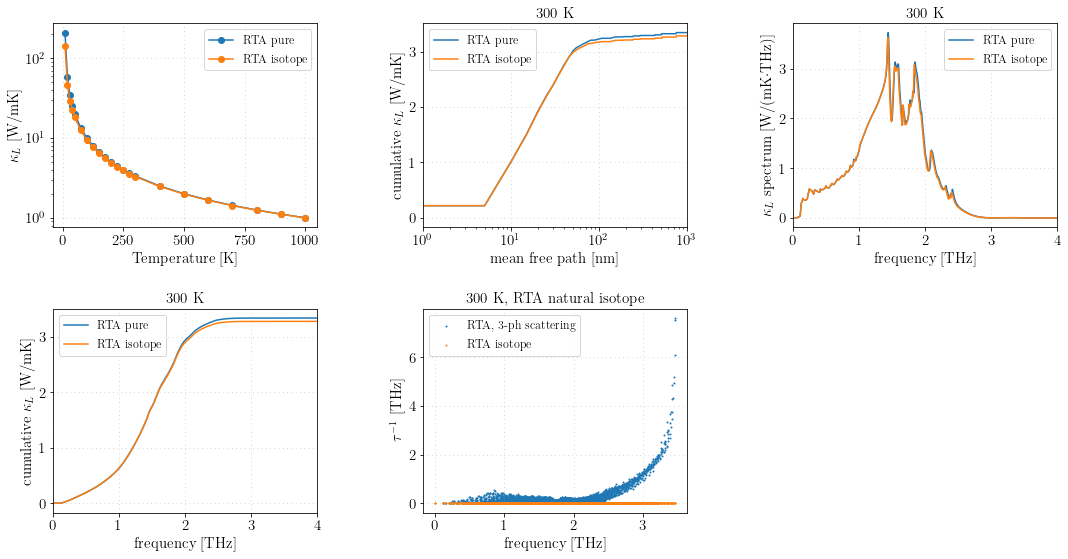

In [77]:
#####################################################################
# real 
fig = plt.figure(figsize=(18, 9))

gs = gridspec.GridSpec(nrows=2, ncols=3, wspace=0.4, hspace=0.4)
#gs.update(hspace=0.1)

######################################################################
# kappa_L
ax = plt.subplot(gs[0])

ax.plot(kappa_L_wo_isotope[:,0], kappa_L_wo_isotope[:,1], marker = "o",color='#1f77b4', label = "RTA pure")
ax.plot(kappa_L_w_isotope[:,0], kappa_L_w_isotope[:,1], marker = "o",color='#ff7f0e', label = "RTA isotope")



ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

#ax.set_xlim(0.0, 0.410057)
#ax.set_ylim(0.0, 120.0)
ax.set_yscale("log")
ax.set_xlabel(r'Temperature [K]')
ax.set_ylabel(r'$\kappa_L$ [W/mK]')
ax.legend()

######################################################################
# mfp vs cumulative thermal conductivity

ax = plt.subplot(gs[1])

ax.plot(mfp_cumlkappa_wo_isotope[:,0], mfp_cumlkappa_wo_isotope[:,1], color='#1f77b4', label = "RTA pure")
ax.plot(mfp_cumlkappa_wo_isotope[:,0], mfp_cumlkappa_w_isotope[:,1], color='#ff7f0e', label = "RTA isotope")

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

ax.set_xlim(1.0, 1000.0)
#ax.set_ylim(0.0, 120.0)
ax.set_title("300 K")
ax.set_xscale("log")
ax.set_xlabel(r'mean free path [nm]')
ax.set_ylabel(r'cumulative $\kappa_L$ [W/mK]')
ax.legend()

######################################################################
# kappa_L spectrum

ax = plt.subplot(gs[2])

ax.plot(kappa_spec_wo_isotope[:,1]/THz_to_kayser/(2.0*np.pi), kappa_spec_wo_isotope[:,2]*THz_to_kayser*(2.0*np.pi), color='#1f77b4', label = "RTA pure")
ax.plot(kappa_spec_w_isotope[:,1]/THz_to_kayser/(2.0*np.pi), kappa_spec_w_isotope[:,2]*THz_to_kayser*(2.0*np.pi), color='#ff7f0e', label = "RTA isotope")

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

ax.set_xlim(0.0, 4.0)
#ax.set_ylim(0.0, 120.0)
ax.set_title("300 K")
#ax.set_xscale("log")
ax.set_xlabel(r'frequency [THz]')
ax.set_ylabel(r'$\kappa_L$ spectrum [W/(mK$\cdot$THz)]')
ax.legend()


######################################################################
# freq vs cumulative kappa

ax = plt.subplot(gs[3])

ax.plot(freq_cumlkappa_wo_isotope[:,0]/THz_to_kayser/(2.0*np.pi), freq_cumlkappa_wo_isotope[:,1], color='#1f77b4', label = "RTA pure")
ax.plot(freq_cumlkappa_w_isotope[:,0]/THz_to_kayser/(2.0*np.pi), freq_cumlkappa_w_isotope[:,1], color='#ff7f0e', label = "RTA isotope")

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

ax.set_xlim(0.0, 4.0)
#ax.set_ylim(0.0, 120.0)
ax.set_title("300 K")
#ax.set_xscale("log")
ax.set_xlabel(r'frequency [THz]')
ax.set_ylabel(r'cumulative $\kappa_L$ [W/mK]')
ax.legend()

######################################################################
# invtau

ax = plt.subplot(gs[4])
 
ax.scatter(tau_w_isotope_3ph[:,2]/THz_to_kayser/(2.0*np.pi), 1.0/tau_w_isotope_3ph[:,3], color='#1f77b4', s = 1.0, label = "RTA, 3-ph scattering")


ax.scatter(self_isotope[:,2]/THz_to_kayser/(2.0*np.pi), 2.0*self_isotope[:,3]/THz_to_kayser, color='#ff7f0e', s=1.0,label = "RTA isotope")

ax.grid(linestyle=(0,(1.5,7)), lw=0.5, color='0.6')

#ax.set_xlim(0.0, 4.0)
#ax.set_ylim(0.0, 0.02)
ax.set_title("300 K, RTA natural isotope")
#ax.set_xscale("log")
ax.set_xlabel(r'frequency [THz]')
ax.set_ylabel(r'$\tau^{-1}$ [THz]')
ax.legend()

fig.savefig("4_3_kappa_production.pdf")

In [78]:
# write calculation results to excel file

# converged thermal conductivity
kappa_L_wo_isotope
kappa_L_wwo_isotope = np.concatenate([kappa_L_wo_isotope[:, 0:2], (kappa_L_w_isotope[:, 1]).reshape([22,1])], axis = 1)

df_kappaL_converged = pd.DataFrame(kappa_L_wwo_isotope, columns = ["temperature [K]", "kappa RTA pure [W/mK]", "kappa RTA isotope [W/mK]"])

with pd.ExcelWriter('result/4_thermal_conductivity/kappaL_converged.xlsx') as writer:
    df_kappaL_converged.to_excel(writer, sheet_name="kappa_L")



In [79]:
# write calculation results to excel file

# q,j-resolved analysis of k RTA isotope
qj_resolved_kappaRTA_isotope = np.stack([tau_w_isotope[:, 2]/THz_to_kayser/(2.0*np.pi), tau_w_isotope[:, 5], tau_w_isotope[:, 7]])

qj_resolved_kappaRTA_isotope = qj_resolved_kappaRTA_isotope.T

df_qj_resolved_kappaRTA_isotope = pd.DataFrame(qj_resolved_kappaRTA_isotope, columns=["f [THz]", "mfp [nm]", "mode contribution [W/mK]"])


In [80]:
# write calculation results to excel file

# q,j resolved analysis of scattering rate
tau_w_isotope = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030_isotope/download/tau_300K.txt')
tau_w_isotope_3ph = np.loadtxt('../5_thermal_conductivity/analysis/kpoints303030_isotope/download/tau_300K_wo_isotope.txt')

freq_invtau_isotope = np.stack([tau_w_isotope[:,2]/THz_to_kayser/(2.0*np.pi), 1.0/tau_w_isotope_3ph[:,3], 1.0/tau_w_isotope[:,3]-1.0/tau_w_isotope_3ph[:,3]])
freq_invtau_isotope = freq_invtau_isotope.T

df_freq_invtau_isotope = pd.DataFrame(freq_invtau_isotope, columns=["f [THz]", "1/tau_3ph [THz]", "1/tau_iso [THz]"])
df_freq_invtau_isotope

with pd.ExcelWriter('result/4_thermal_conductivity/qj_resolved_analysis_RTA_isotope.xlsx') as writer:
    df_qj_resolved_kappaRTA_isotope.to_excel(writer, sheet_name="f, mfp, mode kappa")
    df_freq_invtau_isotope.to_excel(writer, sheet_name="scattering rate")



<ipython-input-80-d326426758fe>:7: RuntimeWarning: divide by zero encountered in true_divide
  freq_invtau_isotope = np.stack([tau_w_isotope[:,2]/THz_to_kayser/(2.0*np.pi), 1.0/tau_w_isotope_3ph[:,3], 1.0/tau_w_isotope[:,3]-1.0/tau_w_isotope_3ph[:,3]])
<ipython-input-80-d326426758fe>:7: RuntimeWarning: invalid value encountered in subtract
  freq_invtau_isotope = np.stack([tau_w_isotope[:,2]/THz_to_kayser/(2.0*np.pi), 1.0/tau_w_isotope_3ph[:,3], 1.0/tau_w_isotope[:,3]-1.0/tau_w_isotope_3ph[:,3]])


In [81]:
# write calculation results
mfp_cumlkappa = np.stack([mfp_cumlkappa_wo_isotope[:,0], mfp_cumlkappa_wo_isotope[:,1], mfp_cumlkappa_w_isotope[:,1]], axis = 1)

df_mfp_cumlkappa = pd.DataFrame(mfp_cumlkappa, columns=["mfp [nm]", "accumulated kappa(RTA pure) [W/mK]", "accumulated kappa(RTA natural isotope) [W/mK]"])

In [82]:
freq_cumlkappa = np.stack([freq_cumlkappa_wo_isotope[:,0]/THz_to_kayser/(2.0*np.pi), freq_cumlkappa_wo_isotope[:,1], freq_cumlkappa_w_isotope[:,1]])

freq_cumlkappa = freq_cumlkappa.T

df_freq_cumlkappa = pd.DataFrame(freq_cumlkappa, columns=["f [THz]", "accumulated kappa(RTA pure) [W/mK]", "accumulated kappa(RTA natural isotope) [W/mK]"])

with pd.ExcelWriter('result/4_thermal_conductivity/cumulative_kappa.xlsx') as writer:
    df_mfp_cumlkappa.to_excel(writer, sheet_name="mfp vs cumulative kappa")
    df_freq_cumlkappa.to_excel(writer, sheet_name="frequency vs cumulative kappa")

